In [1]:
import os, sys

repo_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
if repo_root not in sys.path:
    sys.path.insert(0, repo_root)

print("repo_root:", repo_root)

repo_root: /Users/andrej/Desktop/Python Projects/mm_sim


01 Single path analysis

This notebook runs a single Avellaneda–Stoikov market-making simulation path and visualises:

1. Mid-price over time
2. Bid and ask quotes over time
3. Bid-ask spread over time
4. Inventory over time
5. PnL over time (with components)
6. Fill events overlaid on price


In [2]:
import matplotlib.pyplot as plt

from mm_sim.params import SimParams, QuoteParams
from mm_sim.simulator import simulate_path

# utils_plotting.py is in the same folder as this notebook
from utils_plotting import (
    plot_mid,
    plot_quotes,
    plot_inventory,
    plot_pnl,
    plot_fills_on_price,
    plot_bid_ask_step
)


In [3]:
sim = SimParams(S0=100.0, sigma=0.02, T=600, dt=0.1, seed=42, max_position=None)
quote = QuoteParams(gamma=0.1, k=1.5, lambda0=1.5, tick_size=0.01, min_spread_ticks=1)

df = simulate_path(sim, quote)
df.head()

,t,mid,bid,ask,inventory,cash,pnl,fill_bid,fill_ask
0,0.0,100.000000,99.34,100.66,0,0.0,0.0,0,0
1,0.1,100.001927,99.34,100.66,0,0.0,0.0,0,0
2,0.2,99.995350,99.33,100.66,0,0.0,0.0,0,0
3,0.3,100.000096,99.34,100.66,0,0.0,0.0,0,0
4,0.4,100.006045,99.34,100.67,0,0.0,0.0,0,0


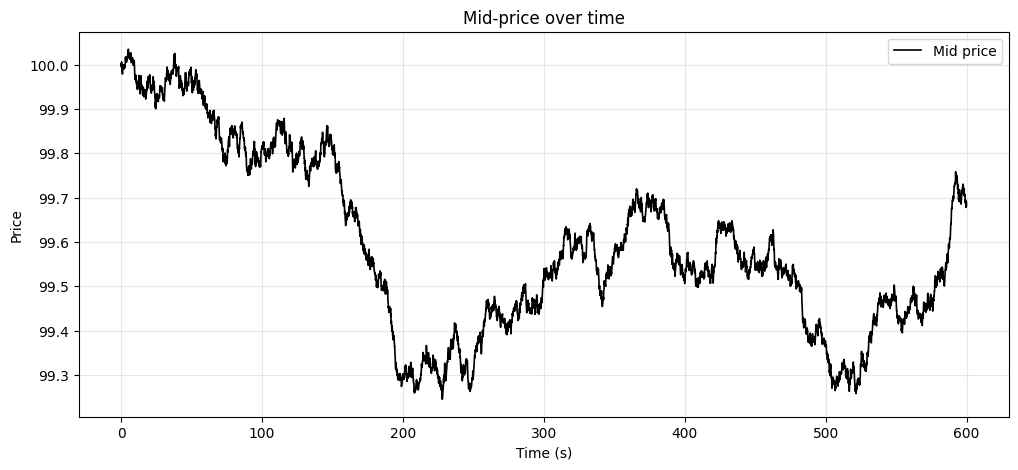

In [4]:
plot_mid(df)
plt.show()


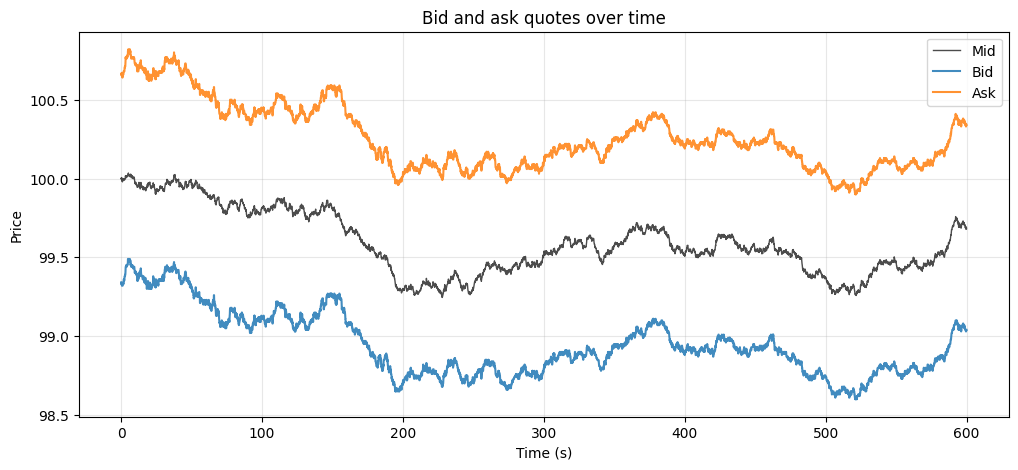

In [5]:
plot_quotes(df)
plt.show()


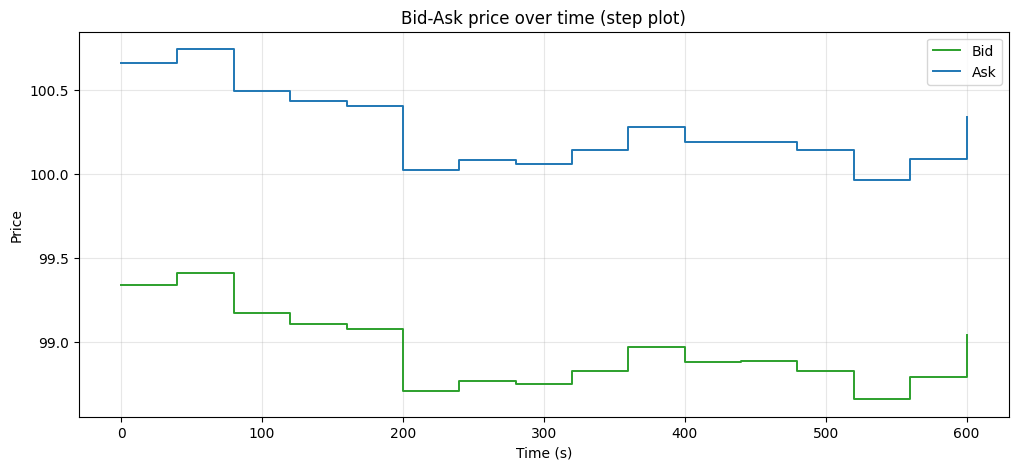

In [6]:
plot_bid_ask_step(df, show_mid=False, downsample=400)
plt.show()

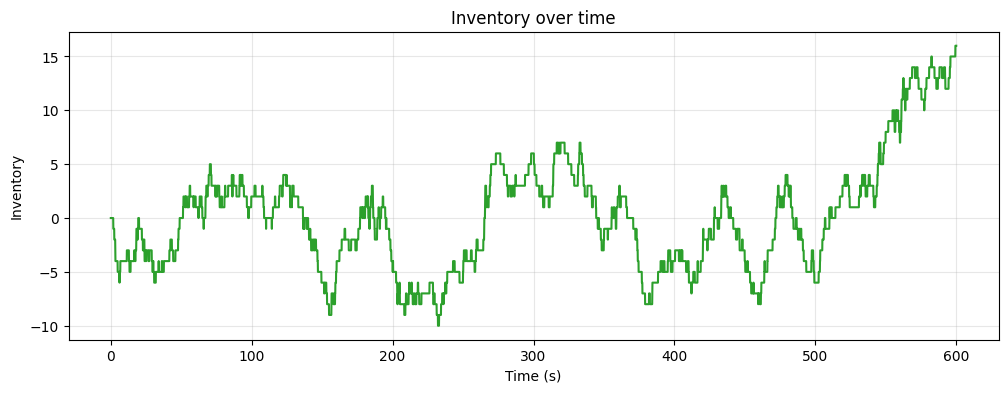

In [7]:
plot_inventory(df, max_position=sim.max_position)
plt.show()


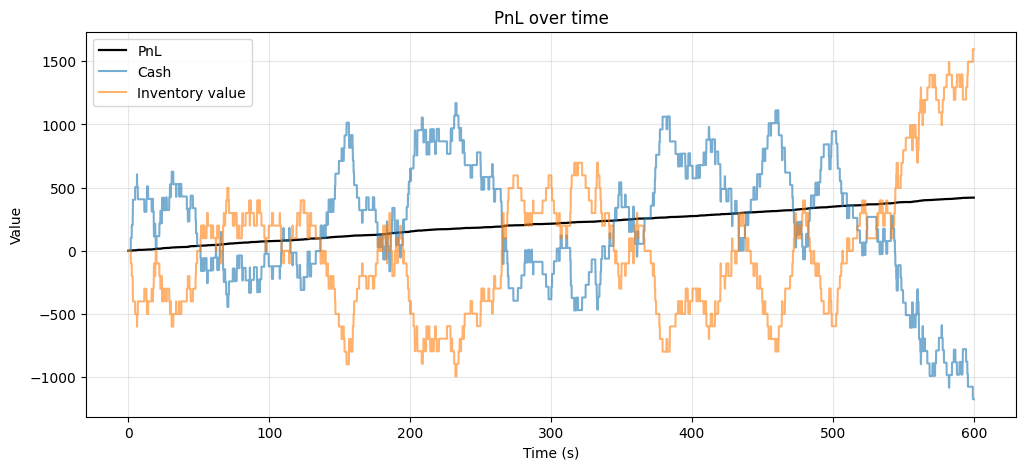

In [8]:
plot_pnl(df, show_components=True)
plt.show()


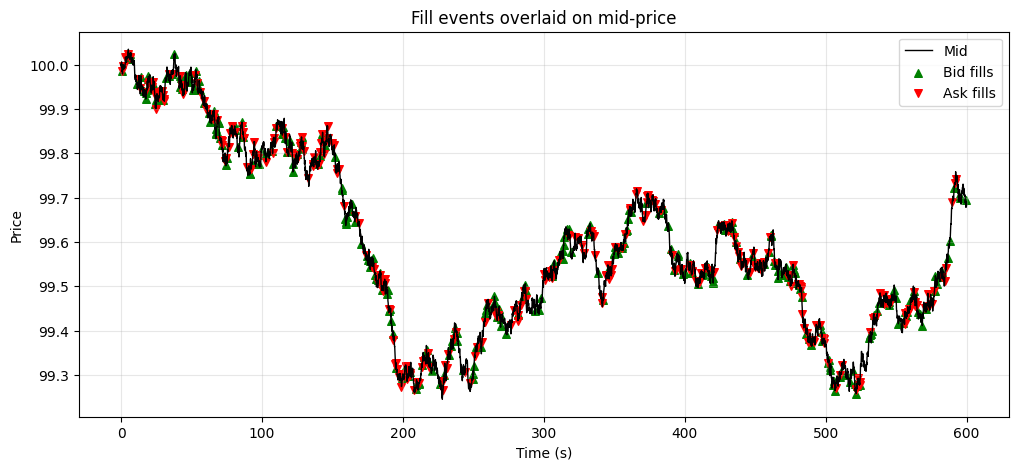

In [9]:
plot_fills_on_price(df)
plt.show()


Notes

- Change `sigma`, `lambda0`, `gamma`, and `k` to explore different regimes.
- To cap inventory, set `max_position` in `SimParams`.
